### Import modules needed for assignement

In [1]:
import numpy as np
import pandas as pd

In [2]:
import folium
from folium import plugins
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json
import glob
import os

In [3]:
## charts 
%matplotlib inline 

import matplotlib as plt
from matplotlib import pyplot
#from matplotlib import cm

import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

### Load data , clean and prepare

#### Geo data for Gosport

In [4]:
filename=r'C:/Users/Adey/OneDrive/IBM_DS/CAPSTONE_FINAL_PREP/Wards_December_2017_Gosport.geojson'

#### check out the make up of the json data 

In [5]:
with open(filename) as json_data:
    data = json.load(json_data,) 

## check out the make up of the json data
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'objectid': 2888,
    'wd17cd': 'E05004531',
    'wd17nm': 'Alverstoke',
    'wd17nmw': ' ',
    'bng_e': 459199,
    'bng_n': 98865,
    'long': -1.16156006,
    'lat': 50.78630066,
    'st_areashape': 1710002.418025,
    'st_lengthshape': 8139.1422723535525},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-1.175976741370578, 50.78645581364621],
      [-1.1710693569427526, 50.78560004875168],
      [-1.1662733959587825, 50.785576665989836],
      [-1.1613737860191378, 50.78437606318475],
      [-1.1548602508996526, 50.78166445349546],
      [-1.1497909281051355, 50.77828503753998],
      [-1.1485538033992244, 50.77892618346102],
      [-1.1484996713197095, 50.782370053781186],
      [-1.1474442447667903, 50.78611955237203],
      [-1.142815734717874, 50.79043994744174],
      [-1.145249737103155, 50.791481185063795],
      [-1.1450912084185592, 50.79223897972083],
      [-1.1493600659490448, 50

#### Features has the information that we are interested in

In [6]:
gosport_geo = data
wards = data['features']

In [7]:
wards[0]

{'type': 'Feature',
 'properties': {'objectid': 2888,
  'wd17cd': 'E05004531',
  'wd17nm': 'Alverstoke',
  'wd17nmw': ' ',
  'bng_e': 459199,
  'bng_n': 98865,
  'long': -1.16156006,
  'lat': 50.78630066,
  'st_areashape': 1710002.418025,
  'st_lengthshape': 8139.1422723535525},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-1.175976741370578, 50.78645581364621],
    [-1.1710693569427526, 50.78560004875168],
    [-1.1662733959587825, 50.785576665989836],
    [-1.1613737860191378, 50.78437606318475],
    [-1.1548602508996526, 50.78166445349546],
    [-1.1497909281051355, 50.77828503753998],
    [-1.1485538033992244, 50.77892618346102],
    [-1.1484996713197095, 50.782370053781186],
    [-1.1474442447667903, 50.78611955237203],
    [-1.142815734717874, 50.79043994744174],
    [-1.145249737103155, 50.791481185063795],
    [-1.1450912084185592, 50.79223897972083],
    [-1.1493600659490448, 50.79296084708993],
    [-1.1517407335505851, 50.79311853489873],
    [-1.1519353649920232, 50

#### Define Neighbourhoods and their lat and longs

In [8]:
column_names = ['Neighbourhood','Latitude','Longitude']
neighbourhoods = pd.DataFrame(columns=column_names)

for i in range(17):
    neighbourhood_name = wards[i]['properties']['wd17nm']
    mylat = wards[i]['properties']['lat']
    mylong = wards[i]['properties']['long']
    neighbourhoods = neighbourhoods.append({'Neighbourhood':neighbourhood_name,
                                           'Latitude':mylat,
                                           'Longitude':mylong}, ignore_index = True)
neighbourhoods

Neighbourhood   Latitude  Longitude
0            Alverstoke  50.786301   -1.16156
1              Anglesey  50.783199   -1.13577
2      Bridgemary North  50.832001   -1.17331
3      Bridgemary South  50.825401   -1.16649
4            Brockhurst  50.804600   -1.15482
5          Christchurch  50.798500   -1.13104
6                 Elson  50.817299   -1.15143
7                Forton  50.804901   -1.14507
8                Grange  50.802200   -1.17246
9               Hardway  50.810200   -1.13804
10             Lee East  50.802700   -1.18437
11             Lee West  50.794498   -1.19333
12             Leesland  50.798401   -1.14155
13          Peel Common  50.819801   -1.17965
14              Privett  50.793098   -1.15631
15  Rowner and Holbrook  50.814400   -1.16343
16                 Town  50.792301   -1.12953

### Gosport Lat and Long co ordinates and test map

In [9]:
#gosport lat and long
lat = 50.80
long = -1.13

#change to current dir
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')

In [10]:
gosportmap0 = folium.Map(location=[lat,long], zoom_start=13)
folium.GeoJson(
    gosport_geo,
    name='geojson'
).add_to(gosportmap0)
for lat, long, name in zip(neighbourhoods['Latitude'],neighbourhoods['Longitude'],neighbourhoods['Neighbourhood']):
    folium.Marker([lat,long], popup = name).add_to(gosportmap0)
gosportmap0.save('gosport.html')
gosportmap0

### Load Crime data, clean and prepare  
#### Each month is an individual csv
#### Load July 2018 crime data csv for Hampshire as test

In [11]:
##crime data load and clean
filename2 = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\crimedata\2018-07-hampshire-street.csv'
df1 = pd.read_csv(filename2)
df1.head()

Crime ID    Month  \
0                                                NaN  2018-07   
1  56fbd60d20e21c365b2dbbfe84dc85ddd0ead4eea7062d...  2018-07   
2  a4fad7d84b61b188ecf9a2811dded8498596cfa30475bd...  2018-07   
3  7ecfc1a0a354fca519019a588392ebcaab5de94e1cb4f1...  2018-07   
4  30868498070c66782d72c7a595b16a9d2679dbc822a158...  2018-07   

              Reported by            Falls within  Longitude   Latitude  \
0  Hampshire Constabulary  Hampshire Constabulary  -1.149700  51.353134   
1  Hampshire Constabulary  Hampshire Constabulary  -1.145593  51.354669   
2  Hampshire Constabulary  Hampshire Constabulary  -1.146700  51.353067   
3  Hampshire Constabulary  Hampshire Constabulary  -1.144834  51.353800   
4  Hampshire Constabulary  Hampshire Constabulary  -1.155230  51.353821   

                         Location  LSOA code                   LSOA name  \
0       On or near Southdown Road  E01022553  Basingstoke and Deane 001A   
1      On or near Silverdale Road  E01022553  Basingstoke and Deane 001A   
2  On or near Carrington Crescent  E01022553  Basingstoke and Deane 001A   
3            On or near Stanfield  E01022553  Basingstoke and Deane 001A   
4       On or near Huntsmoor Road  E01022554  Basingstoke and Deane 001B   

                     Crime type  \
0         Anti-social behaviour   
1     Criminal damage and arson   
2  Violence and sexual offences   
3                   Other crime   
4     Criminal damage and arson   

                           Last outcome category  Context  
0                                            NaN      NaN  
1  Investigation complete; no suspect identified      NaN  
2                    Unable to prosecute suspect      NaN  
3                      Status update unavailable      NaN  
4  Investigation complete; no suspect identified      NaN

In [12]:
df1.shape

(15965, 12)

#### Looks fine, so load all csv files for one years worth of data and make into one datafame

In [13]:
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\crimedata')
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]
crime_df = pd.concat([pd.read_csv(f) for f in all_files])
crime_df.shape

(177331, 12)

In [14]:
crime_df.tail()

Crime ID    Month  \
14708  33a76fa5ea51b77883862bb9eb02a46879f2e696aba66b...  2019-07   
14709                                                NaN  2019-07   
14710  e41c049da8457a96199769a2c826bf40d6a1f3577b23f0...  2019-07   
14711  07794eb9698bfd821fe6f4e9e1d0499960c96c2c490f02...  2019-07   
14712  27b07622718835e7490abbe65e7b368e1ba3799d7e7e87...  2019-07   

                  Reported by            Falls within  Longitude   Latitude  \
14708  Hampshire Constabulary  Hampshire Constabulary  -1.072105  50.902571   
14709  Hampshire Constabulary  Hampshire Constabulary  -1.065220  50.900556   
14710  Hampshire Constabulary  Hampshire Constabulary  -1.066402  50.897589   
14711  Hampshire Constabulary  Hampshire Constabulary  -1.066777  50.901620   
14712  Hampshire Constabulary  Hampshire Constabulary  -1.066777  50.901620   

                        Location  LSOA code        LSOA name  \
14708  On or near Southwick Road  E01023233  Winchester 014D   
14709       On or near Field Way  E01023234  Winchester 014E   
14710        On or near Kilnside  E01023234  Winchester 014E   
14711     On or near Southernhay  E01023234  Winchester 014E   
14712     On or near Southernhay  E01023234  Winchester 014E   

                         Crime type  \
14708                   Other crime   
14709         Anti-social behaviour   
14710     Criminal damage and arson   
14711  Violence and sexual offences   
14712  Violence and sexual offences   

                            Last outcome category  Context  
14708  Action to be taken by another organisation      NaN  
14709                                         NaN      NaN  
14710                         Under investigation      NaN  
14711                         Under investigation      NaN  
14712                         Under investigation      NaN

#### Strip out the unnesscary columns. We only need the Lat and Long, LSOA Codes and crime type

In [15]:
crime_df1 = crime_df[['Longitude','Latitude','LSOA code','LSOA name','Crime type']]
crime_df1.head()

Longitude   Latitude  LSOA code                   LSOA name  \
0  -1.149700  51.353134  E01022553  Basingstoke and Deane 001A   
1  -1.145593  51.354669  E01022553  Basingstoke and Deane 001A   
2  -1.146700  51.353067  E01022553  Basingstoke and Deane 001A   
3  -1.144834  51.353800  E01022553  Basingstoke and Deane 001A   
4  -1.155230  51.353821  E01022554  Basingstoke and Deane 001B   

                     Crime type  
0         Anti-social behaviour  
1     Criminal damage and arson  
2  Violence and sexual offences  
3                   Other crime  
4     Criminal damage and arson

#### We have no neighbourhoods in the crime data.
#### So I download from the ONS site the ward name and matching LSOA codes

In [16]:
#load ward data and clean
ward_file = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\gosport_wards.csv'
ward_df = pd.read_csv(ward_file)
ward_df.head()

LSOA11CD      LSOA11NM     WD18CD            WD18NM  WD18NMW    LAD18CD  \
0  E01022805  Gosport 002B  E05004534  Bridgemary South      NaN  E07000088   
1  E01022803  Gosport 001D  E05004534  Bridgemary South      NaN  E07000088   
2  E01022807  Gosport 005A  E05004535        Brockhurst      NaN  E07000088   
3  E01032882  Gosport 004G  E05004539            Grange      NaN  E07000088   
4  E01022820  Gosport 004B  E05004539            Grange      NaN  E07000088   

   LAD18NM  
0  Gosport  
1  Gosport  
2  Gosport  
3  Gosport  
4  Gosport

#### Strip out the unnescary columns. Leaving only the LSOA and Ward name.
#### Change ward into neighbourhood

In [17]:
ward_df1 = ward_df[['LSOA11CD','WD18NM']]
ward_df1.rename(columns = {'LSOA11CD': 'LSOA code','WD18NM':'Neighbourhood'},inplace=True)
ward_df1.head()

C:\Users\Adey\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


LSOA code     Neighbourhood
0  E01022805  Bridgemary South
1  E01022803  Bridgemary South
2  E01022807        Brockhurst
3  E01032882            Grange
4  E01022820            Grange

#### Make a dataframe with with only gosport crimes

In [18]:
#drop all wards in crime not in gosport
gos_df = crime_df1[crime_df1['LSOA code'].isin(ward_df1['LSOA code'])]
gos_df.head()

Longitude   Latitude  LSOA code     LSOA name                 Crime type
3433  -1.181999  50.828340  E01022800  Gosport 001A      Anti-social behaviour
3434  -1.180570  50.831316  E01022800  Gosport 001A                   Burglary
3435  -1.183082  50.827313  E01022800  Gosport 001A  Criminal damage and arson
3436  -1.179927  50.825826  E01022800  Gosport 001A  Criminal damage and arson
3437  -1.180570  50.831316  E01022800  Gosport 001A  Criminal damage and arson

#### merge Neighbor into crime dataframe

In [19]:
crime_df2 =  pd.merge(gos_df,ward_df1,on=['LSOA code'])
crime_df2.head()

Longitude   Latitude  LSOA code     LSOA name                 Crime type  \
0  -1.181999  50.828340  E01022800  Gosport 001A      Anti-social behaviour   
1  -1.180570  50.831316  E01022800  Gosport 001A                   Burglary   
2  -1.183082  50.827313  E01022800  Gosport 001A  Criminal damage and arson   
3  -1.179927  50.825826  E01022800  Gosport 001A  Criminal damage and arson   
4  -1.180570  50.831316  E01022800  Gosport 001A  Criminal damage and arson   

      Neighbourhood  
0  Bridgemary North  
1  Bridgemary North  
2  Bridgemary North  
3  Bridgemary North  
4  Bridgemary North

#### Analyse Crime by Neighbourhood


In [20]:
## analyse each neighbourhood
# one hot encoding
crime_onehot = pd.get_dummies(crime_df2[['Crime type']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
crime_onehot['Neighbourhood'] =crime_df2['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [crime_onehot.columns[-1]] + list(crime_onehot.columns[:-1])
crime_onehot = crime_onehot[fixed_columns]

crime_onehot.columns

Index(['Neighbourhood', 'Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
       'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences'],
      dtype='object')

In [21]:
crime_grouped = crime_onehot.groupby('Neighbourhood').mean().reset_index()
crime_grouped

Neighbourhood  Anti-social behaviour  Bicycle theft  Burglary  \
0            Alverstoke               0.076726       0.163683  0.074169   
1              Anglesey               0.145695       0.013245  0.079470   
2      Bridgemary North               0.075342       0.018265  0.041096   
3      Bridgemary South               0.076110       0.021142  0.071882   
4            Brockhurst               0.039666       0.014614  0.070981   
5          Christchurch               0.073559       0.027833  0.083499   
6                 Elson               0.071839       0.022989  0.066092   
7                Forton               0.086643       0.014440  0.023466   
8                Grange               0.093385       0.014267  0.027237   
9               Hardway               0.090625       0.021875  0.062500   
10             Lee East               0.068421       0.021053  0.021053   
11             Lee West               0.098462       0.033846  0.036923   
12             Leesland               0.065041       0.039024  0.069919   
13          Peel Common               0.061538       0.071795  0.087179   
14              Privett               0.087500       0.025000  0.108333   
15  Rowner and Holbrook               0.083141       0.073903  0.060046   
16                 Town               0.070393       0.055210  0.045549   

    Criminal damage and arson     Drugs  Other crime  Other theft  \
0                    0.112532  0.017903     0.010230     0.074169   
1                    0.125828  0.033113     0.006623     0.092715   
2                    0.207763  0.011416     0.006849     0.061644   
3                    0.154334  0.008457     0.010571     0.042283   
4                    0.121086  0.031315     0.010438     0.077244   
5                    0.081511  0.019881     0.005964     0.091451   
6                    0.143678  0.008621     0.020115     0.083333   
7                    0.088448  0.012635     0.016245     0.070397   
8                    0.136187  0.015564     0.020752     0.062257   
9                    0.159375  0.006250     0.021875     0.081250   
10                   0.121053  0.021053     0.021053     0.100000   
11                   0.163077  0.040000     0.012308     0.061538   
12                   0.107317  0.014634     0.017886     0.081301   
13                   0.087179  0.015385     0.005128     0.051282   
14                   0.145833  0.020833     0.008333     0.054167   
15                   0.150115  0.016166     0.025404     0.060046   
16                   0.084886  0.020014     0.009662     0.064182   

    Possession of weapons  Public order   Robbery  Shoplifting  \
0                0.007673      0.051151  0.007673     0.071611   
1                0.006623      0.066225  0.006623     0.000000   
2                0.013699      0.077626  0.002283     0.041096   
3                0.010571      0.073996  0.000000     0.046512   
4                0.014614      0.060543  0.020877     0.006263   
5                0.005964      0.093439  0.013917     0.007952   
6                0.002874      0.066092  0.000000     0.100575   
7                0.005415      0.052347  0.003610     0.131769   
8                0.010376      0.073930  0.005188     0.040208   
9                0.003125      0.065625  0.003125     0.012500   
10               0.015789      0.078947  0.005263     0.015789   
11               0.009231      0.073846  0.000000     0.110769   
12               0.006504      0.097561  0.011382     0.034146   
13               0.010256      0.092308  0.005128     0.076923   
14               0.008333      0.095833  0.004167     0.025000   
15               0.011547      0.069284  0.000000     0.011547   
16               0.012422      0.101449  0.007591     0.202208   

    Theft from the person  Vehicle crime  Violence and sexual offences  
0                0.007673       0.040921                      0.283887  
1                0.006623       0.086093                      0.331126  
2       

#### Upload data for median house price for gosport from ONS

In [22]:
#median house price load and clean
filename3 = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\median_house_gosport.csv'
df_hp = pd.read_csv(filename3,thousands=',')
df_hp.rename(columns = {'Ward':'Neighbourhood','Year ending Dec 2018':'Median House Price'},inplace= True)
df_hp.sort_values('Median House Price')

Neighbourhood  Median House Price
8                Grange              159000
16                 Town              168600
12             Leesland              171568
5          Christchurch              175000
4            Brockhurst              178000
7                Forton              188118
3      Bridgemary South              202250
9               Hardway              202250
15  Rowner and Holbrook              204000
6                 Elson              207500
2      Bridgemary North              220000
13          Peel Common              230000
14              Privett              265000
0            Alverstoke              267000
10             Lee East              300500
11             Lee West              315000
1              Anglesey              332433

#### Add house price data to Crime on neighbourhood

In [23]:
# add to crime df
crime_df2 =  pd.merge(crime_df2,df_hp,on=['Neighbourhood'])

In [24]:
crime_df2.head()

Longitude   Latitude  LSOA code     LSOA name                 Crime type  \
0  -1.181999  50.828340  E01022800  Gosport 001A      Anti-social behaviour   
1  -1.180570  50.831316  E01022800  Gosport 001A                   Burglary   
2  -1.183082  50.827313  E01022800  Gosport 001A  Criminal damage and arson   
3  -1.179927  50.825826  E01022800  Gosport 001A  Criminal damage and arson   
4  -1.180570  50.831316  E01022800  Gosport 001A  Criminal damage and arson   

      Neighbourhood  Median House Price  
0  Bridgemary North              220000  
1  Bridgemary North              220000  
2  Bridgemary North              220000  
3  Bridgemary North              220000  
4  Bridgemary North              220000

### load population density for neighbourhoods

In [25]:
filename_pop = r'C:\Users\Adey\OneDrive\IBM_DS\CAPSTONE_FINAL_PREP\DATA\pop_density_gosport.csv'
dfpop = pd.read_csv(filename_pop)
dfpop.sort_values('Population')

Neighbourhood   County  Population
16             Anglesey  Gosport        3688
15              Privett  Gosport        4287
14          Peel Common  Gosport        4307
13           Alverstoke  Gosport        4436
12                Elson  Gosport        4637
11     Bridgemary North  Gosport        4773
10               Forton  Gosport        4793
9      Bridgemary South  Gosport        4844
8              Leesland  Gosport        5008
7   Rowner and Holbrook  Gosport        5018
6              Lee West  Gosport        5102
5          Christchurch  Gosport        5392
4            Brockhurst  Gosport        5482
3                  Town  Gosport        5538
2               Hardway  Gosport        5731
1              Lee East  Gosport        6164
0                Grange  Gosport        6309

#### add pop density to crime

In [26]:
dfpop.drop(columns = ['County'], inplace = True)

In [27]:
crime_df2 = pd.merge(crime_df2,dfpop,on=['Neighbourhood'])
crime_df2.head()

Longitude   Latitude  LSOA code     LSOA name                 Crime type  \
0  -1.181999  50.828340  E01022800  Gosport 001A      Anti-social behaviour   
1  -1.180570  50.831316  E01022800  Gosport 001A                   Burglary   
2  -1.183082  50.827313  E01022800  Gosport 001A  Criminal damage and arson   
3  -1.179927  50.825826  E01022800  Gosport 001A  Criminal damage and arson   
4  -1.180570  50.831316  E01022800  Gosport 001A  Criminal damage and arson   

      Neighbourhood  Median House Price  Population  
0  Bridgemary North              220000        4773  
1  Bridgemary North              220000        4773  
2  Bridgemary North              220000        4773  
3  Bridgemary North              220000        4773  
4  Bridgemary North              220000        4773

###  Load foursquare data and prepare it

In [28]:
## Explore Wards  icon=folium.Icon('info-sign'),
## foursquare 
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FZ3YCJJ5SFRN4EMRJRWTY4YQZOGZFOJ35GVE55V1YEAVGU3Q
CLIENT_SECRET:3ZKXP3XO3QJWQGAMEMZ1O4EYOIVZ5ZEAEXWGB0FB12TOIPA2


#### test api

In [29]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            50.783, 
            -1.1357, 
            1500, 
            20)
results = requests.get(url).json()['response']['groups'][0]['items'][0]['venue']['name']
results


'Stokes Bay'

In [30]:
requests.get(url).json()['response']['groups'][0]

{'type': 'Recommended Places',
 'name': 'recommended',
 'items': [{'reasons': {'count': 0,
    'items': [{'summary': 'This spot is popular',
      'type': 'general',
      'reasonName': 'globalInteractionReason'}]},
   'venue': {'id': '4c03bd8439d476b0177530a7',
    'name': 'Stokes Bay',
    'location': {'address': 'Stokes Bay Rd.',
     'lat': 50.783198208718304,
     'lng': -1.155256836095664,
     'labeledLatLngs': [{'label': 'display',
       'lat': 50.783198208718304,
       'lng': -1.155256836095664}],
     'distance': 1376,
     'postalCode': 'PO1 2 2',
     'cc': 'GB',
     'city': 'Gosport',
     'state': 'Hampshire',
     'country': 'United Kingdom',
     'formattedAddress': ['Stokes Bay Rd.',
      'Gosport',
      'Hampshire',
      'PO1 2 2',
      'United Kingdom']},
    'categories': [{'id': '4bf58dd8d48988d1e2941735',
      'name': 'Beach',
      'pluralName': 'Beaches',
      'shortName': 'Beach',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_o

#### Define function and get nearly venues

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500, LIMIT=20):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    
    return(nearby_venues)

In [32]:
gosport_venues = getNearbyVenues(names=neighbourhoods['Neighbourhood'],
                                 latitudes = neighbourhoods['Latitude'],
                                 longitudes = neighbourhoods['Longitude']
                                )

Alverstoke
Anglesey
Bridgemary North
Bridgemary South
Brockhurst
Christchurch
Elson
Forton
Grange
Hardway
Lee East
Lee West
Leesland
Peel Common
Privett
Rowner and Holbrook
Town


In [33]:
print(gosport_venues.shape)
gosport_venues.head()

(261, 7)


Neighbourhood  Neighbourhood Latitude  Neighborhood Longitude  \
0    Alverstoke               50.786301                -1.16156   
1    Alverstoke               50.786301                -1.16156   
2    Alverstoke               50.786301                -1.16156   
3    Alverstoke               50.786301                -1.16156   
4    Alverstoke               50.786301                -1.16156   

            Venue  Venue Latitude  Venue Longitude Venue Category  
0      Stokes Bay       50.783198        -1.155257          Beach  
1    Pebbles Cafe       50.782148        -1.154836           Café  
2    Bayside Cafe       50.786356        -1.169271     Restaurant  
3  The Cocked Hat       50.794823        -1.162816            Pub  
4           Shell       50.792754        -1.150394    Gas Station

In [34]:
gosport_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  Neighborhood Longitude  Venue  \
Neighbourhood                                                                
Alverstoke                               14                      14     14   
Anglesey                                 18                      18     18   
Bridgemary North                         13                      13     13   
Bridgemary South                         10                      10     10   
Brockhurst                               20                      20     20   
Christchurch                             20                      20     20   
Elson                                    11                      11     11   
Forton                                   17                      17     17   
Grange                                   10                      10     10   
Hardway                                  10                      10     10   
Lee East                                 18                      18     18   
Lee West                                 14                      14     14   
Leesland                                 20                      20     20   
Peel Common                              12                      12     12   
Privett                                  20                      20     20   
Rowner and Holbrook                      14                      14     14   
Town                                     20                      20     20   

                     Venue Latitude  Venue Longitude  Venue Category  
Neighbourhood                                                         
Alverstoke                       14               14              14  
Anglesey                         18               18              18  
Bridgemary North                 13               13              13  
Bridgemary South                 10               10              10  
Brockhurst                       20               20              20  
Christchurch                     20               20              20  
Elson                            11               11              11  
Forton                           17               17              17  
Grange                           10               10              10  
Hardway                          10               10              10  
Lee East                         18               18              18  
Lee West                         14               14              14  
Leesland                         20               20              20  
Peel Common                      12               12              12  
Privett                          20               20              20  
Rowner and Holbrook              14               14              14  
Town                             20               20              20

In [35]:
print('There are {} uniques categories.'.format(len(gosport_venues['Venue Category'].unique())))

There are 40 uniques categories.


#### Lets look at each neighboor

In [36]:
## analyse each neighbourhood
# one hot encoding
gosport_onehot = pd.get_dummies(gosport_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gosport_onehot['Neighbourhood'] = gosport_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [gosport_onehot.columns[-1]] + list(gosport_onehot.columns[:-1])
gosport_onehot = gosport_onehot[fixed_columns]

gosport_onehot.columns

Index(['Neighbourhood', 'Athletics & Sports', 'Beach', 'Bistro',
       'Boat or Ferry', 'Café', 'Chinese Restaurant', 'Coffee Shop',
       'Construction & Landscaping', 'Convenience Store',
       'Fast Food Restaurant', 'Fish & Chips Shop', 'Fried Chicken Joint',
       'Furniture / Home Store', 'Gas Station', 'Gastropub', 'Go Kart Track',
       'Grocery Store', 'Gym / Fitness Center', 'Harbor / Marina',
       'Hardware Store', 'History Museum', 'Hotel', 'Italian Restaurant',
       'Park', 'Pet Store', 'Pharmacy', 'Pizza Place', 'Playground', 'Pub',
       'Restaurant', 'Rugby Stadium', 'Sandwich Place', 'Scenic Lookout',
       'Seafood Restaurant', 'Shop & Service', 'Skating Rink', 'Soccer Field',
       'Supermarket', 'Tea Room', 'Warehouse Store'],
      dtype='object')

In [37]:
gosport_onehot.shape

(261, 41)

In [38]:
gosport_grouped = gosport_onehot.groupby('Neighbourhood').mean().reset_index()
gosport_grouped

Neighbourhood  Athletics & Sports     Beach    Bistro  \
0            Alverstoke            0.000000  0.071429  0.000000   
1              Anglesey            0.000000  0.055556  0.000000   
2      Bridgemary North            0.000000  0.000000  0.000000   
3      Bridgemary South            0.000000  0.000000  0.000000   
4            Brockhurst            0.000000  0.000000  0.000000   
5          Christchurch            0.000000  0.000000  0.000000   
6                 Elson            0.000000  0.000000  0.000000   
7                Forton            0.000000  0.000000  0.000000   
8                Grange            0.000000  0.000000  0.000000   
9               Hardway            0.000000  0.000000  0.000000   
10             Lee East            0.000000  0.055556  0.000000   
11             Lee West            0.000000  0.071429  0.071429   
12             Leesland            0.000000  0.000000  0.000000   
13          Peel Common            0.083333  0.000000  0.000000   
14              Privett            0.000000  0.050000  0.000000   
15  Rowner and Holbrook            0.000000  0.000000  0.000000   
16                 Town            0.000000  0.000000  0.000000   

    Boat or Ferry      Café  Chinese Restaurant  Coffee Shop  \
0        0.000000  0.071429            0.000000     0.000000   
1        0.055556  0.055556            0.000000     0.000000   
2        0.000000  0.000000            0.000000     0.076923   
3        0.000000  0.000000            0.000000     0.000000   
4        0.000000  0.000000            0.000000     0.050000   
5        0.000000  0.000000            0.000000     0.100000   
6        0.000000  0.000000            0.000000     0.000000   
7        0.000000  0.000000            0.000000     0.000000   
8        0.000000  0.000000            0.100000     0.100000   
9        0.000000  0.000000            0.000000     0.000000   
10       0.000000  0.111111            0.000000     0.055556   
11       0.000000  0.142857            0.071429     0.000000   
12       0.000000  0.000000            0.000000     0.050000   
13       0.000000  0.000000            0.000000     0.000000   
14       0.000000  0.050000            0.000000     0.050000   
15       0.000000  0.000000            0.000000     0.071429   
16       0.000000  0.000000            0.000000     0.150000   

    Construction & Landscaping  Convenience Store       ...         \
0                     0.000000           0.000000       ...          
1                     0.000000           0.000000       ...          
2                     0.000000           0.000000       ...          
3                     0.000000           0.000000       ...          
4                     0.050000           0.050000       ...          
5                     0.000000           0.100000       ...          
6                     0.000000           0.090909       ...          
7                     0.000000           0.117647       ...          
8                     0.000000           0.000000       ...          
9                     0.000000           0.200000       ...          
10                    0.055556           0.000000       ...          
11                    0.000000           0.000000       ...          
12                    0.000000           0.100000       ...          
13                    0.083333           0.000000       ...          
14                    0.000000           0.000000       ...          
15                    0.000000           0.071429       ...          
16                    0.000000           0.000000       ...          

    Rugby Stadium  Sandwich Place  Scenic Lookout  Seafood Restaurant  \
0            0.00        0.000000            0.00            0.000000   
1            0.00        0.000000            0.00            0.000000   
2            0.00        0.000000            0.00            0.000000   
3            0.00        0.000000            0.00            0.000000   
4            0.00       

#### Find the most common venues

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = gosport_grouped['Neighbourhood']

for ind in np.arange(gosport_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gosport_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0            Alverstoke                 Hotel            Restaurant   
1              Anglesey           Supermarket            Restaurant   
2      Bridgemary North        Hardware Store  Fast Food Restaurant   
3      Bridgemary South         Grocery Store  Fast Food Restaurant   
4            Brockhurst         Grocery Store                   Pub   
5          Christchurch           Supermarket         Grocery Store   
6                 Elson                   Pub         Grocery Store   
7                Forton         Grocery Store                   Pub   
8                Grange         Grocery Store                   Pub   
9               Hardway                   Pub     Convenience Store   
10             Lee East                   Pub        Sandwich Place   
11             Lee West                   Pub                  Café   
12             Leesland         Grocery Store           Supermarket   
13          Peel Common                   Pub         Grocery Store   
14              Privett         Grocery Store           Supermarket   
15  Rowner and Holbrook         Grocery Store                   Pub   
16                 Town           Supermarket           Coffee Shop   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Grocery Store                   Pub                 Beach  
1                Grocery Store  Fast Food Restaurant                  Park  
2                Grocery Store            Playground           Supermarket  
3         Gym / Fitness Center         Go Kart Track                 Hotel  
4                  Supermarket           Gas Station           Coffee Shop  
5                  Coffee Shop        History Museum  Fast Food Restaurant  
6                   Playground          Skating Rink                 Hotel  
7                  Gas Station     Convenience Store       Harbor / Marina  
8                  Supermarket          Soccer Field        Sandwich Place  
9                Grocery Store        History Museum           Gas Station  
10                        Café         Grocery Store     Fish & Chips Shop  
11               Grocery Store                 Beach                Bistro  
12                         Pub     Convenience Store           Pizza Place  
13  Construction & Landscaping                 Hotel              Pharmacy  
14                         Pub            Restaurant           Gas Station  
15                 Coffee Shop           Gas Station                 Hotel  
16                         Pub  Fast Food Restaurant         Rugby Stadium

#### what is the venue count by neighbourhood

In [41]:
neigh_venues = gosport_venues.groupby(['Neighbourhood']).size().to_frame(name=('Venue Count')).reset_index()
neigh_venues.sort_values('Venue Count')

Neighbourhood  Venue Count
8                Grange           10
3      Bridgemary South           10
9               Hardway           10
6                 Elson           11
13          Peel Common           12
2      Bridgemary North           13
11             Lee West           14
15  Rowner and Holbrook           14
0            Alverstoke           14
7                Forton           17
10             Lee East           18
1              Anglesey           18
5          Christchurch           20
4            Brockhurst           20
12             Leesland           20
14              Privett           20
16                 Town           20

#### What is the crime count by neighbourhood?

In [42]:
crime_data = crime_df2.groupby(['Neighbourhood']).size().to_frame(name='Crime Count').reset_index()
crime_data.sort_values('Crime Count')

Neighbourhood  Crime Count
1              Anglesey          151
10             Lee East          190
13          Peel Common          195
14              Privett          240
9               Hardway          320
11             Lee West          325
6                 Elson          348
0            Alverstoke          391
15  Rowner and Holbrook          433
2      Bridgemary North          438
3      Bridgemary South          473
4            Brockhurst          479
5          Christchurch          503
7                Forton          554
12             Leesland          615
8                Grange          771
16                 Town         1449

In [43]:
crime_data =  pd.merge(crime_data,df_hp,on=['Neighbourhood'])
crime_data =  pd.merge(crime_data,neigh_venues,on=['Neighbourhood'])
crime_data = pd.merge(crime_data,dfpop,on=['Neighbourhood'])
crime_data.sort_values('Crime Count', ascending = False, inplace = True)

In [44]:
crime_data

Neighbourhood  Crime Count  Median House Price  Venue Count  \
16                 Town         1449              168600           20   
8                Grange          771              159000           10   
12             Leesland          615              171568           20   
7                Forton          554              188118           17   
5          Christchurch          503              175000           20   
4            Brockhurst          479              178000           20   
3      Bridgemary South          473              202250           10   
2      Bridgemary North          438              220000           13   
15  Rowner and Holbrook          433              204000           14   
0            Alverstoke          391              267000           14   
6                 Elson          348              207500           11   
11             Lee West          325              315000           14   
9               Hardway          320              202250           10   
14              Privett          240              265000           20   
13          Peel Common          195              230000           12   
10             Lee East          190              300500           18   
1              Anglesey          151              332433           18   

    Population  
16        5538  
8         6309  
12        5008  
7         4793  
5         5392  
4         5482  
3         4844  
2         4773  
15        5018  
0         4436  
6         4637  
11        5102  
9         5731  
14        4287  
13        4307  
10        6164  
1         3688

In [45]:
crime_type = crime_df.groupby(['Crime type']).size().to_frame(name='Crime Count').reset_index()
crime_type.sort_values('Crime Count', ascending = False)

Crime type  Crime Count
13  Violence and sexual offences        63563
3      Criminal damage and arson        18940
8                   Public order        15909
6                    Other theft        13601
0          Anti-social behaviour        13161
10                   Shoplifting        12810
12                 Vehicle crime        12244
2                       Burglary        11940
4                          Drugs         4139
1                  Bicycle theft         3828
5                    Other crime         2708
7          Possession of weapons         1801
9                        Robbery         1414
11         Theft from the person         1273

#### Find top ten crimes

In [46]:
### find top ten crimes
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Commom Crime'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crime'.format(ind+1))

# create a new dataframe
neighbourhoods_crimes_sorted = pd.DataFrame(columns=columns)
neighbourhoods_crimes_sorted['Neighbourhood'] = crime_grouped['Neighbourhood']

for ind in np.arange(crime_grouped.shape[0]):
    neighbourhoods_crimes_sorted.iloc[ind, 1:] = return_most_common_venues(crime_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_crimes_sorted.head()

Neighbourhood         1st Most Commom Crime      2nd Most Commom Crime  \
0        Alverstoke  Violence and sexual offences              Bicycle theft   
1          Anglesey  Violence and sexual offences      Anti-social behaviour   
2  Bridgemary North  Violence and sexual offences  Criminal damage and arson   
3  Bridgemary South  Violence and sexual offences  Criminal damage and arson   
4        Brockhurst  Violence and sexual offences  Criminal damage and arson   

       3rd Most Commom Crime  4th Most Common Crime 5th Most Common Crime  \
0  Criminal damage and arson  Anti-social behaviour           Other theft   
1  Criminal damage and arson            Other theft         Vehicle crime   
2               Public order  Anti-social behaviour           Other theft   
3      Anti-social behaviour           Public order              Burglary   
4                Other theft          Vehicle crime              Burglary   

  6th Most Common Crime  7th Most Common Crime 8th Most Common Crime  \
0              Burglary            Shoplifting          Public order   
1              Burglary           Public order                 Drugs   
2         Vehicle crime            Shoplifting              Burglary   
3           Shoplifting            Other theft         Vehicle crime   
4          Public order  Anti-social behaviour                 Drugs   

  9th Most Common Crime 10th Most Common Crime  
0         Vehicle crime                  Drugs  
1         Bicycle theft  Theft from the person  
2         Bicycle theft  Possession of weapons  
3         Bicycle theft  Possession of weapons  
4               Robbery  Possession of weapons

#### Plot Crimes per ward

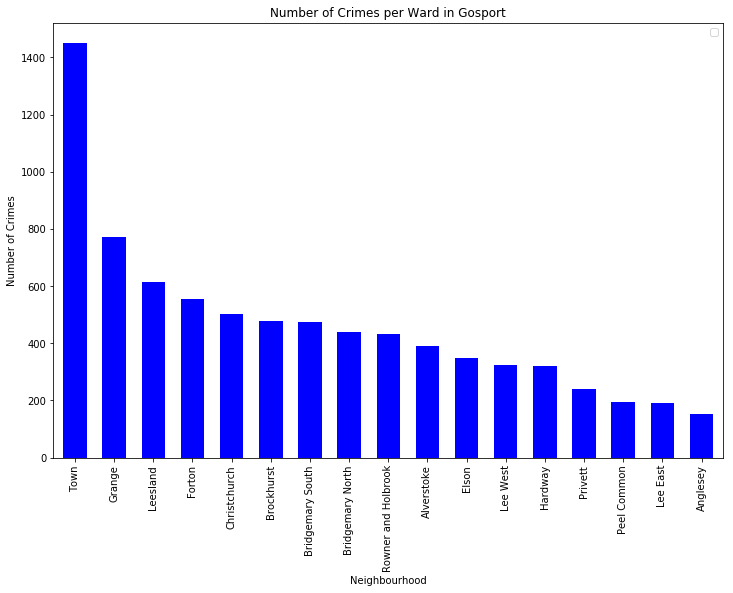

In [47]:
crime_data.plot(kind='bar',x='Neighbourhood',y='Crime Count',
                figsize=(12,8),
                width=0.6,
                color ='b')
plt.pyplot.xlabel("Neighbourhood")
plt.pyplot.ylabel("Number of Crimes")
plt.pyplot.title("Number of Crimes per Ward in Gosport")
plt.pyplot.legend("")

#### Reg plot price and crime relationship

C:\Users\Adey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Crime vs House Price')

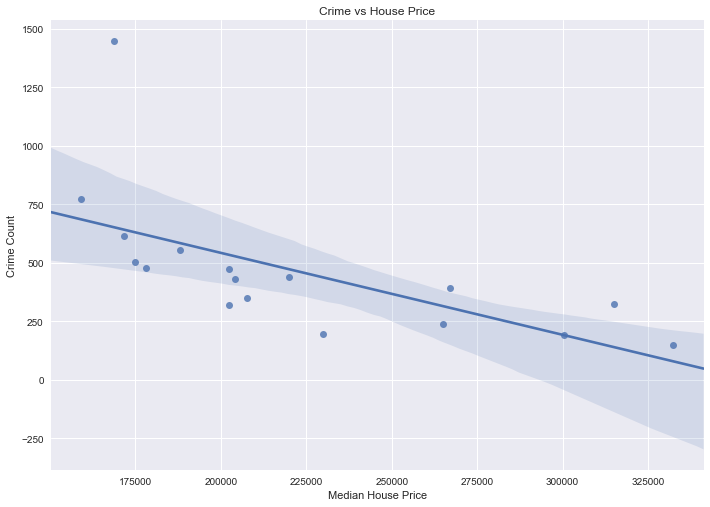

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = crime_data['Median House Price']
y = crime_data['Crime Count']
sns.regplot(x,y,1)
plt.pyplot.title("Crime vs House Price")

#### Reg plot Crime vs Venue

C:\Users\Adey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Crime vs Venue')

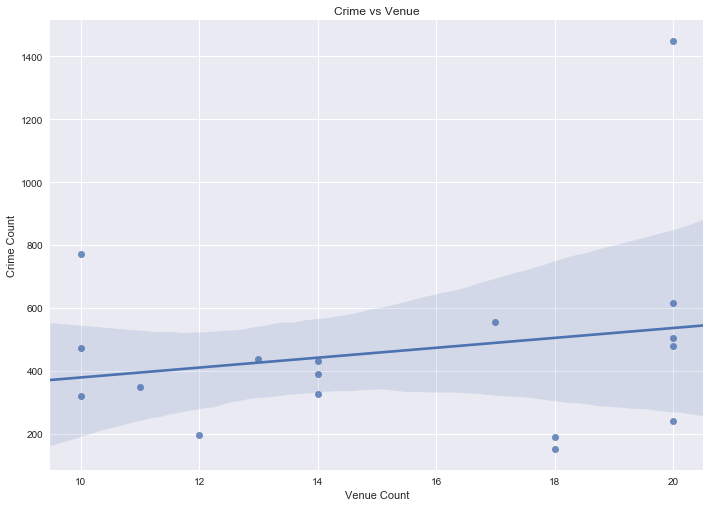

In [49]:
#plot crimes vs number of venues
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = crime_data['Venue Count']
y = crime_data['Crime Count']
sns.regplot(x,y,1)
plt.pyplot.title("Crime vs Venue")

### Crime vs Pop

C:\Users\Adey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Crime vs Population')

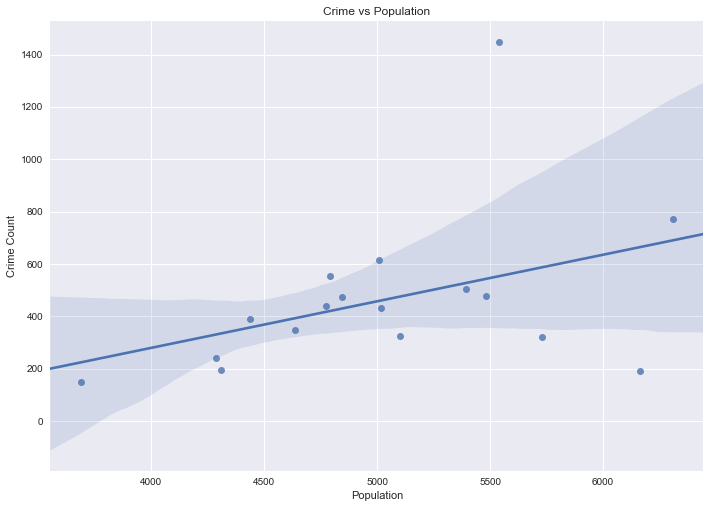

In [50]:
#plot crimes vs pop
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = crime_data['Population']
y = crime_data['Crime Count']
sns.regplot(x,y,1)
plt.pyplot.title("Crime vs Population")

#### Create map and display it 

In [51]:
# create map and display it
gosport_map = folium.Map(location=[lat, long], zoom_start=13)

gosport_map.choropleth(
    geo_data=gosport_geo,
    data=crime_data,
    columns=['Neighbourhood', 'Crime Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Total Crime in Gosport across the Neighbourhoods')

#
os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map.save('Gosport Crime.html')
# display the map of Gosport
gosport_map
###


#### Crime type numbers 

In [52]:
crime_type = crime_df.groupby(['Crime type']).size().to_frame(name='Crime Count').reset_index()
crime_type.sort_values('Crime Count', ascending = False)

Crime type  Crime Count
13  Violence and sexual offences        63563
3      Criminal damage and arson        18940
8                   Public order        15909
6                    Other theft        13601
0          Anti-social behaviour        13161
10                   Shoplifting        12810
12                 Vehicle crime        12244
2                       Burglary        11940
4                          Drugs         4139
1                  Bicycle theft         3828
5                    Other crime         2708
7          Possession of weapons         1801
9                        Robbery         1414
11         Theft from the person         1273

#### Crime type and count by Neighbourhood

In [53]:
crime_type2 = crime_df2[['Neighbourhood','Crime type']]
crime_type2 =crime_type2.pivot_table(index ='Neighbourhood', columns='Crime type', aggfunc=pd.Series.count, fill_value=0)
crime_type2

Crime type           Anti-social behaviour  Bicycle theft  Burglary  \
Neighbourhood                                                         
Alverstoke                              60            128        58   
Anglesey                                44              4        24   
Bridgemary North                        66             16        36   
Bridgemary South                        72             20        68   
Brockhurst                              38             14        68   
Christchurch                            74             28        84   
Elson                                   50             16        46   
Forton                                  96             16        26   
Grange                                 144             22        42   
Hardway                                 58             14        40   
Lee East                                26              8         8   
Lee West                                64             22        24   
Leesland                                80             48        86   
Peel Common                             24             28        34   
Privett                                 42             12        52   
Rowner and Holbrook                     72             64        52   
Town                                   204            160       132   

Crime type           Criminal damage and arson  Drugs  Other crime  \
Neighbourhood                                                        
Alverstoke                                  88     14            8   
Anglesey                                    38     10            2   
Bridgemary North                           182     10            6   
Bridgemary South                           146      8           10   
Brockhurst                                 116     30           10   
Christchurch                                82     20            6   
Elson                                      100      6           14   
Forton                                      98     14           18   
Grange                                     210     24           32   
Hardway                                    102      4           14   
Lee East                                    46      8            8   
Lee West                                   106     26            8   
Leesland                                   132     18           22   
Peel Common                                 34      6            2   
Privett                                     70     10            4   
Rowner and Holbrook                        130     14           22   
Town                                       246     58           28   

Crime type           Other theft  Possession of weapons  Public order  \
Neighbourhood                                                           
Alverstoke                    58                      6            40   
Anglesey                      28                      2            20   
Bridgemary North              54                     12            68   
Bridgemary South              40                     10            70   
Brockhurst                    74                     14            58   
Christchurch                  92                      6            94   
Elson                         58                      2            46   
Forton                        78                      6            58   
Grange                        96                     16           114   
Hardway                       52                      2            42   
Lee East                      38                      6            30   
Lee West                      40                      6            48   
Leesland                     100                      8           120   
Peel Common                   20                      4            36   
Privett                       26                      4            46   
Rowner and Holbrook           52                     10            60   
Town 

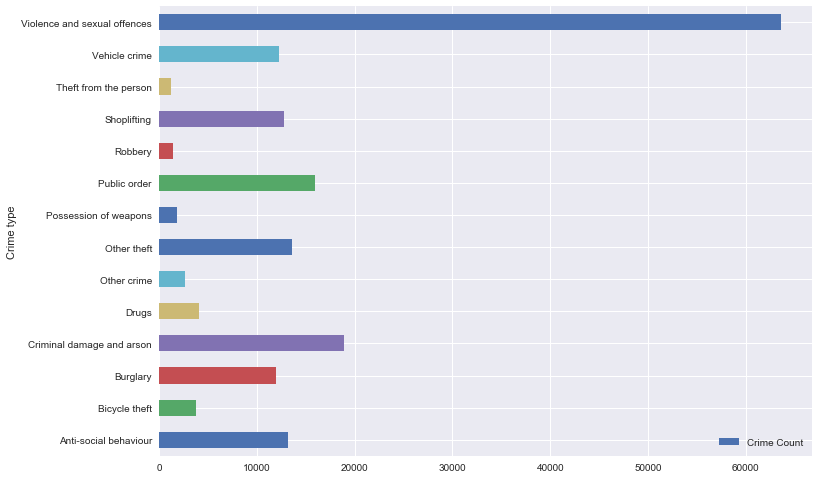

In [54]:
crime_type.plot(x='Crime type', y='Crime Count',kind='barh')

In [55]:
#### Drp sex and violence from gourp as it distorts the stats

In [56]:
## drop sex and violence from stats
#crime_grouped = crime_onehot.groupby('Neighbourhood').mean().reset_index()
crime_grouped.drop(columns = 'Violence and sexual offences', inplace = True)
crime_grouped.head()

Neighbourhood  Anti-social behaviour  Bicycle theft  Burglary  \
0        Alverstoke               0.076726       0.163683  0.074169   
1          Anglesey               0.145695       0.013245  0.079470   
2  Bridgemary North               0.075342       0.018265  0.041096   
3  Bridgemary South               0.076110       0.021142  0.071882   
4        Brockhurst               0.039666       0.014614  0.070981   

   Criminal damage and arson     Drugs  Other crime  Other theft  \
0                   0.112532  0.017903     0.010230     0.074169   
1                   0.125828  0.033113     0.006623     0.092715   
2                   0.207763  0.011416     0.006849     0.061644   
3                   0.154334  0.008457     0.010571     0.042283   
4                   0.121086  0.031315     0.010438     0.077244   

   Possession of weapons  Public order   Robbery  Shoplifting  \
0               0.007673      0.051151  0.007673     0.071611   
1               0.006623      0.066225  0.006623     0.000000   
2               0.013699      0.077626  0.002283     0.041096   
3               0.010571      0.073996  0.000000     0.046512   
4               0.014614      0.060543  0.020877     0.006263   

   Theft from the person  Vehicle crime  
0               0.007673       0.040921  
1               0.006623       0.086093  
2               0.004566       0.041096  
3               0.004228       0.031712  
4               0.002088       0.070981

## Examine Burgeries

In [57]:
#examine burgery
#is_bur = crime_df2['Crime type'] == 'Burglary'
burg_df = crime_df2[crime_df2['Crime type'] == 'Burglary']
burg_df.head()

Longitude   Latitude  LSOA code     LSOA name Crime type  \
1   -1.180570  50.831316  E01022800  Gosport 001A   Burglary   
25  -1.182321  50.826966  E01022800  Gosport 001A   Burglary   
26  -1.177530  50.827337  E01022800  Gosport 001A   Burglary   
27  -1.182116  50.825706  E01022800  Gosport 001A   Burglary   
36  -1.182951  50.828284  E01022800  Gosport 001A   Burglary   

       Neighbourhood  Median House Price  Population  
1   Bridgemary North              220000        4773  
25  Bridgemary North              220000        4773  
26  Bridgemary North              220000        4773  
27  Bridgemary North              220000        4773  
36  Bridgemary North              220000        4773

#### Burgeries by Neighbourhood

In [58]:
burg_df2 = burg_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
burg_df2.sort_values('Count', ascending = False)

Neighbourhood  Count
16                 Town     66
12             Leesland     43
5          Christchurch     42
3      Bridgemary South     34
4            Brockhurst     34
0            Alverstoke     29
14              Privett     26
15  Rowner and Holbrook     26
6                 Elson     23
8                Grange     21
9               Hardway     20
2      Bridgemary North     18
13          Peel Common     17
7                Forton     13
1              Anglesey     12
11             Lee West     12
10             Lee East      4

In [59]:
#More detail look


gosport_map1 = folium.Map(location = [lat, long], zoom_start = 13)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(gosport_map1)

gosport_map1.choropleth(
    geo_data=gosport_geo,
    data=burg_df2,
    columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Burglary Crime in Gosport across the Neighbourhoods')

# loop through the dataframe and add each data point to the mark cluster
for lati, lng, label, in zip(burg_df['Latitude'], burg_df['Longitude'], burg_df['Crime type']):
    folium.Marker(
        location=[lati, lng],
        icon= None,
        popup=label,
    ).add_to(incidents)

os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map1.save('Gosport  Burglary Crime.html')

# display map
gosport_map1

### Vehcile Theft

In [60]:
#examine motor theft
veh_df = crime_df2[crime_df2['Crime type'] == 'Vehicle crime']
veh_df.head()


Longitude   Latitude  LSOA code     LSOA name     Crime type  \
59   -1.182321  50.826966  E01022800  Gosport 001A  Vehicle crime   
77   -1.182321  50.826966  E01022800  Gosport 001A  Vehicle crime   
168  -1.181225  50.829567  E01022800  Gosport 001A  Vehicle crime   
180  -1.177550  50.828579  E01022801  Gosport 001B  Vehicle crime   
181  -1.176645  50.829184  E01022801  Gosport 001B  Vehicle crime   

        Neighbourhood  Median House Price  Population  
59   Bridgemary North              220000        4773  
77   Bridgemary North              220000        4773  
168  Bridgemary North              220000        4773  
180  Bridgemary North              220000        4773  
181  Bridgemary North              220000        4773

In [61]:
veh_df2 = veh_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
veh_df2.sort_values('Count', ascending = False)

Neighbourhood  Count
8                Grange     50
6                 Elson     39
16                 Town     36
4            Brockhurst     34
12             Leesland     31
5          Christchurch     30
7                Forton     29
14              Privett     28
9               Hardway     27
15  Rowner and Holbrook     24
2      Bridgemary North     18
11             Lee West     17
0            Alverstoke     16
3      Bridgemary South     15
10             Lee East     15
1              Anglesey     13
13          Peel Common     12

In [62]:
#More detail look at vehicle crime
gosport_map2 = folium.Map(location = [lat, long], zoom_start = 13)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(gosport_map2)

gosport_map2.choropleth(
    geo_data=gosport_geo,
    data=veh_df2,
    columns=['Neighbourhood', 'Count'],
    key_on='feature.properties.wd17nm',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Vehicle Crime in Gosport across the Neighbourhoods')

# loop through the dataframe and add each data point to the mark cluster
for lati, lng, label, in zip(veh_df['Latitude'], veh_df['Longitude'], veh_df['Crime type']):
    folium.Marker(
        location=[lati, lng],
        icon= None,
        popup=label,
    ).add_to(incidents)

os.chdir(r'C:\Users\Adey\OneDrive\IBM_DS\Capstone')
gosport_map2.save('Gosport Vehicle Crime.html')
    
# display map
gosport_map2

### Cluster the neighbourhoods based on pop,crime,house price. 

In [63]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

gosport_grouped_clustering = crime_data.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gosport_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 0, 0, 2, 4, 2, 1])

In [64]:
# add clustering labels
#crime_data.drop(columns='Cluster Labels',inplace = True)
crime_data.insert(0, 'Cluster Labels', kmeans.labels_)
crime_data.head()
gosport_merged = neighbourhoods

#merge  to add latitude/longitude for each neighborhood
gosport_merged = gosport_merged.join(crime_data.set_index('Neighbourhood'), on='Neighbourhood')

gosport_merged.head() # check the last columns!

Neighbourhood   Latitude  Longitude  Cluster Labels  Crime Count  \
0        Alverstoke  50.786301   -1.16156               1          391   
1          Anglesey  50.783199   -1.13577               3          151   
2  Bridgemary North  50.832001   -1.17331               4          438   
3  Bridgemary South  50.825401   -1.16649               2          473   
4        Brockhurst  50.804600   -1.15482               0          479   

   Median House Price  Venue Count  Population  
0              267000           14        4436  
1              332433           18        3688  
2              220000           13        4773  
3              202250           10        4844  
4              178000           20        5482

In [65]:
# Matplotlib and associated plotting modules

gosport_merged['Cluster Labels'] = gosport_merged['Cluster Labels'].fillna(value=0).astype(int)

# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=13)

for lat, long, name in zip(gosport_merged['Latitude'],gosport_merged['Longitude'],gosport_merged['Neighbourhood']):
    folium.Marker([lat,long], popup = name).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gosport_merged['Latitude'], gosport_merged['Longitude'], gosport_merged['Neighbourhood'], gosport_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
    ).add_to(map_clusters)
       
map_clusters

#### What do the cluster consist off

In [66]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 0, gosport_merged.columns[[0] + list(range(3, gosport_merged.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
4     Brockhurst               0          479              178000   
5   Christchurch               0          503              175000   
8         Grange               0          771              159000   
12      Leesland               0          615              171568   
16          Town               0         1449              168600   

    Venue Count  Population  
4            20        5482  
5            20        5392  
8            10        6309  
12           20        5008  
16           20        5538

In [67]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 1, gosport_merged.columns[[0] + list(range(3, gosport_merged.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
0     Alverstoke               1          391              267000   
14       Privett               1          240              265000   

    Venue Count  Population  
0            14        4436  
14           20        4287

In [68]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 2, gosport_merged.columns[[0] + list(range(3, gosport_merged.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
3      Bridgemary South               2          473              202250   
6                 Elson               2          348              207500   
7                Forton               2          554              188118   
9               Hardway               2          320              202250   
15  Rowner and Holbrook               2          433              204000   

    Venue Count  Population  
3            10        4844  
6            11        4637  
7            17        4793  
9            10        5731  
15           14        5018

In [69]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 3, gosport_merged.columns[[0] + list(range(3, gosport_merged.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
1       Anglesey               3          151              332433   
10      Lee East               3          190              300500   
11      Lee West               3          325              315000   

    Venue Count  Population  
1            18        3688  
10           18        6164  
11           14        5102

In [70]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 4, gosport_merged.columns[[0] + list(range(3, gosport_merged.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
2   Bridgemary North               4          438              220000   
13       Peel Common               4          195              230000   

    Venue Count  Population  
2            13        4773  
13           12        4307

In [71]:
gosport_merged.loc[gosport_merged['Cluster Labels'] == 5, gosport_merged.columns[[0] + list(range(4, gosport_merged.shape[1]))]]

Empty DataFrame
Columns: [Neighbourhood, Crime Count, Median House Price, Venue Count, Population]
Index: []

#### Scale the features and re do the Cluster Analysis

In [72]:
import sklearn
from sklearn.preprocessing import StandardScaler
gosport_group2 = crime_data.drop('Cluster Labels', 1, inplace = True)
gosport_group2 = crime_data.set_index('Neighbourhood')
scaled_features = StandardScaler().fit_transform(gosport_group2.values)

C:\Users\Adey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Adey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
scaled_features_df = pd.DataFrame(scaled_features, index=gosport_group2.index, columns=gosport_group2.columns)
scaled_features_df = scaled_features_df.reset_index()
scaled_features_df.head()

Neighbourhood  Crime Count  Median House Price  Venue Count  Population
0          Town     3.371531           -1.030229     1.207268    0.762254
1        Grange     1.052623           -1.212979    -1.390651    1.919006
2      Leesland     0.519068           -0.973729     1.207268   -0.032919
3        Forton     0.310435           -0.658676     0.427893   -0.355489
4  Christchurch     0.136004           -0.908396     1.207268    0.543207

In [74]:
# set number of clusters
kclusters = 5

gosport_group3 = scaled_features_df.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gosport_group3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 2, 2, 2, 4, 4, 4, 1])

In [75]:
# add clustering labels
#crime_data.drop(columns='Cluster Labels',inplace = True)
crime_data.insert(0, 'Cluster Labels', kmeans.labels_)
#scaled_features_df.head()
gosport_merged2 = neighbourhoods

#merge  to add latitude/longitude for each neighborhood
gosport_merged2 = gosport_merged2.join(crime_data.set_index('Neighbourhood'), on='Neighbourhood')



In [76]:
gosport_merged2.head() # check the last columns!

Neighbourhood   Latitude  Longitude  Cluster Labels  Crime Count  \
0        Alverstoke  50.786301   -1.16156               1          391   
1          Anglesey  50.783199   -1.13577               1          151   
2  Bridgemary North  50.832001   -1.17331               4          438   
3  Bridgemary South  50.825401   -1.16649               4          473   
4        Brockhurst  50.804600   -1.15482               2          479   

   Median House Price  Venue Count  Population  
0              267000           14        4436  
1              332433           18        3688  
2              220000           13        4773  
3              202250           10        4844  
4              178000           20        5482

In [77]:
# Matplotlib and associated plotting modules

#gosport_merged2['Cluster Labels'] = gosport_merged2['Cluster Labels'].fillna(value=0).astype(int)

# create map
map_clusters2 = folium.Map(location=[lat, long], zoom_start=13)

for lat, long, name in zip(gosport_merged2['Latitude'],gosport_merged2['Longitude'],gosport_merged2['Neighbourhood']):
      folium.Marker([lat,long], popup = name).add_to(map_clusters2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gosport_merged2['Latitude'], gosport_merged2['Longitude'], gosport_merged2['Neighbourhood'], gosport_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
    ).add_to(map_clusters2)
       
map_clusters2

#### Lets remind ourselves of the max min and avergae of the relevant columns

In [78]:
print("Crime Min", gosport_merged2['Crime Count'].min())
print("Crime Max", gosport_merged2['Crime Count'].max())
print("Crime Avg", gosport_merged2['Crime Count'].mean())
print("House Price Min", gosport_merged2['Median House Price'].min())
print("House Price Max", gosport_merged2['Median House Price'].max())
print("House Price Avg", gosport_merged2['Median House Price'].mean())
print("Venue Count Min", gosport_merged2['Venue Count'].min())
print("Venue Count Max", gosport_merged2['Venue Count'].max())
print("Venue Count Avg", gosport_merged2['Venue Count'].mean())
print("Population Min", gosport_merged2['Population'].min())
print("Population Max", gosport_merged2['Population'].max())
print("Population Avg", gosport_merged2['Population'].mean())

Crime Min 151
Crime Max 1449
Crime Avg 463.2352941176471
House Price Min 159000
House Price Max 332433
House Price Avg 222718.76470588235
Venue Count Min 10
Venue Count Max 20
Venue Count Avg 15.352941176470589
Population Min 3688
Population Max 6309
Population Avg 5029.941176470588


#### lets look at the scaledclusters

Around average crime and below avergae house price and low venue count with high population

In [79]:
gosport_merged2.loc[gosport_merged2['Cluster Labels'] == 0, gosport_merged2.columns[[0] + list(range(3, gosport_merged2.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  Venue Count  \
8        Grange               0          771              159000           10   
9       Hardway               0          320              202250           10   

   Population  
8        6309  
9        5731

Low crime, High house price, high venue count and misxed population count

In [80]:
gosport_merged2.loc[gosport_merged2['Cluster Labels'] == 1, gosport_merged2.columns[[0] + list(range(3, gosport_merged2.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
0     Alverstoke               1          391              267000   
1       Anglesey               1          151              332433   
10      Lee East               1          190              300500   
11      Lee West               1          325              315000   
14       Privett               1          240              265000   

    Venue Count  Population  
0            14        4436  
1            18        3688  
10           18        6164  
11           14        5102  
14           20        4287

High Crime, cheap house prices, high venue count and high population

In [81]:
gosport_merged2.loc[gosport_merged2['Cluster Labels'] == 2, gosport_merged2.columns[[0] + list(range(3, gosport_merged2.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
4     Brockhurst               2          479              178000   
5   Christchurch               2          503              175000   
7         Forton               2          554              188118   
12      Leesland               2          615              171568   

    Venue Count  Population  
4            20        5482  
5            20        5392  
7            17        4793  
12           20        5008

very high crime, cheap housing high venue count and high population

In [82]:
gosport_merged2.loc[gosport_merged2['Cluster Labels'] == 3, gosport_merged2.columns[[0] + list(range(3, gosport_merged2.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
16          Town               3         1449              168600   

    Venue Count  Population  
16           20        5538

Avergae crime, avergae house price, average venues below avergae population

In [83]:
gosport_merged2.loc[gosport_merged2['Cluster Labels'] == 4, gosport_merged2.columns[[0] + list(range(3, gosport_merged2.shape[1]))]]

Neighbourhood  Cluster Labels  Crime Count  Median House Price  \
2      Bridgemary North               4          438              220000   
3      Bridgemary South               4          473              202250   
6                 Elson               4          348              207500   
13          Peel Common               4          195              230000   
15  Rowner and Holbrook               4          433              204000   

    Venue Count  Population  
2            13        4773  
3            10        4844  
6            11        4637  
13           12        4307  
15           14        5018